# Lesson 18: 심슨의 역설

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/08_ggplot2/2023-02-01-Lesson19.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# imports

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# 판다스: melt, stack

### melt

`-` 설명:

`-` 데이터

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

`-` 사용예시1: 기본사용

In [12]:
df.melt()

-   variable: column name들이 들어간다.
-   value: column name에 대응하는 값들이 들어간다.

`-` 사용예시2: id_vars –\> tidy data

In [28]:
df.melt(id_vars='Date')

`-` 사용예시3:

In [9]:
df.set_index('Date').melt()

`-` 사용예시4: ignore_index=False

In [37]:
df.melt(id_vars='Date')

In [10]:
df.set_index('Date').melt(ignore_index=False).reset_index()

## stack

`-` 설명:

In [48]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

`-` 사용예시1

In [12]:
df.stack()

`-` 사용예시2

In [13]:
df.stack().stack().reset_index().rename({0:'value'},axis=1)
#df.stack().stack().reset_index().rename(columns={'level_2':'aggtype'})

`-` 사용예시3 (unstack)

In [65]:
df.stack().unstack()

> melt, stack 을 set_index와 reset_index와 함께 사용하면 tidydata를
> 만들기 용이하다.

# tidydata

## tidydata의 정의

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by
등을 쓰기 좋은 자료

`-` 정의: https://r4ds.had.co.nz/tidy-data.html

-   Each variable must have its own column.
-   Each observation must have its own row.
-   Each value must have its own cell.

예시1 (tidy data)

| obs |  x  |  y  | shape  | color |
|:---:|:---:|:---:|:------:|:-----:|
|  0  |  0  |  0  | ‘star’ |  ‘F’  |
|  1  |  0  |  1  | ‘circ’ |  ‘F’  |
|  2  |  1  |  0  | ‘star’ |  ‘M’  |
|  3  |  1  |  1  | ‘circ’ |  ‘M’  |

예시2 (tidy data x)

|         | shape=star | shape=circ |
|:-------:|:----------:|:----------:|
| color=F |   (0,0)    |   (0,1)    |
| color=M |   (1,0)    |   (1,1)    |

## 예제1: wide df

`-` data

In [740]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

-   tidy data 아님
-   정의에 의한 판단: 하나의 observation이 하나의 행을 차지하고 있지
    않음.
-   직관적인 판단: 회사별로 색을 다르게 하여 x:‘Date’, y:’판매량’을 하고
    싶다면?

`-` tidydata로 변환 (melt는 너무 쉬우니까 stack으로 해보자)

In [747]:
df.set_index('Date').stack().reset_index().rename({'level_1':'Company',0:'Sales'},axis=1)

## 예제2: multi-indexed data

`-` 데이터

In [748]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

-   tidy data 아님
-   정의에 의한 판단: 하나의 셀에 여러 관측치가 있음 (표안의 표 느낌)
-   직관적인 판단: WEEKDAY == 4 and mean(CANCELLED) \> 0.001 인 자료를
    뽑고 싶다면?

`-` tidydata로 변환 (stack으로 풀면 너무 쉬우니까 melt로 해보자)

In [753]:
df.melt(ignore_index=False).reset_index()

# barplot

In [835]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.query('Nationality=="Korea Republic" or Nationality=="Japan"')\
[['Nationality','Overall','Age']].reset_index(drop=True)
df

## geom_col

`-` 예시1: 한국과 일본의 평균능력치 비교

In [765]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

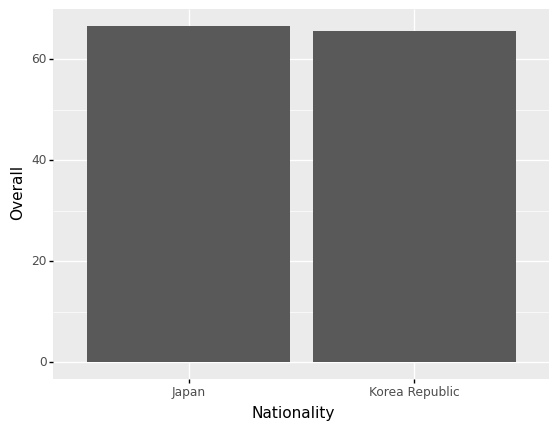

In [766]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall'))

`-` 예시2: 한국과 일본의 평균능력치 비교 (색상변경)

In [767]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

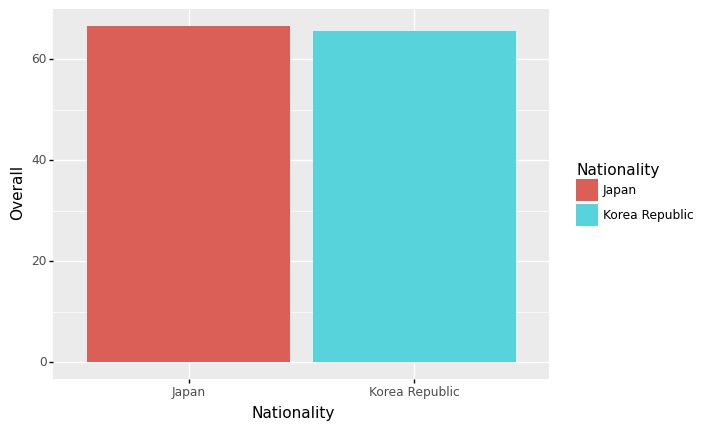

In [769]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))
#ggplot(data)+geom_col(aes(x='Nationality',y='Overall',color='Nationality'))

`-` 예시3: 한국과 일본의 평균연령 비교

In [770]:
data=df.groupby('Nationality').agg({'Age':np.mean}).reset_index()
data

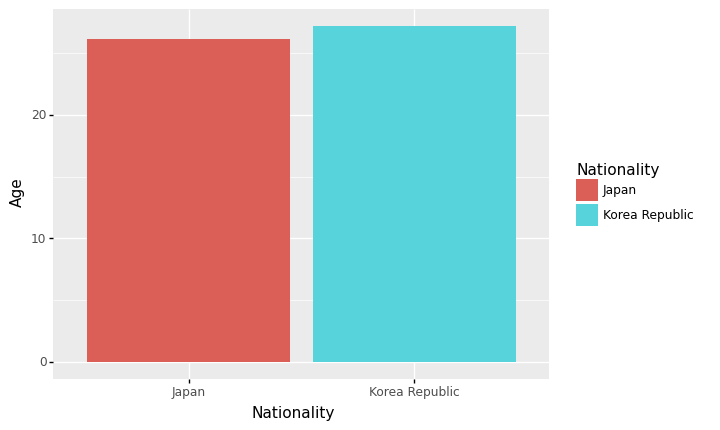

In [772]:
ggplot(data)+geom_col(aes(x='Nationality',y='Age',fill='Nationality'))

## geom_col + position=‘dodge’

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교

In [786]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

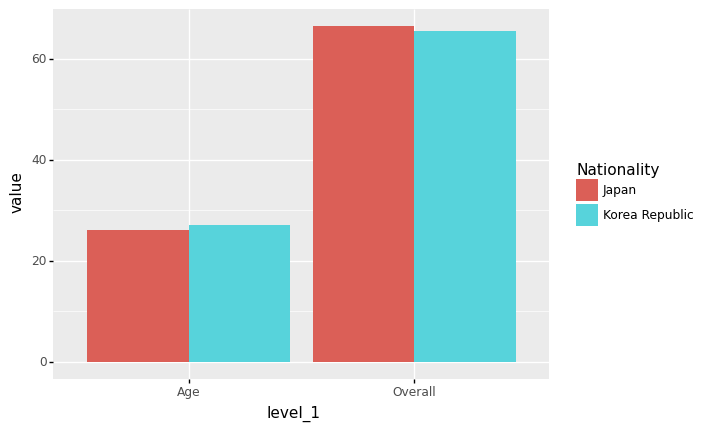

In [788]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')

## geom_col + coord_flip()

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (90도회전)

In [789]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

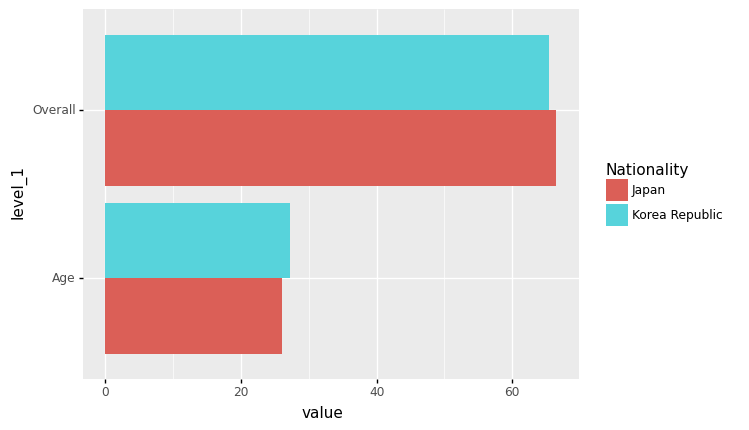

In [790]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+coord_flip()

## geom_col + facet_wrap(var)

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [791]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

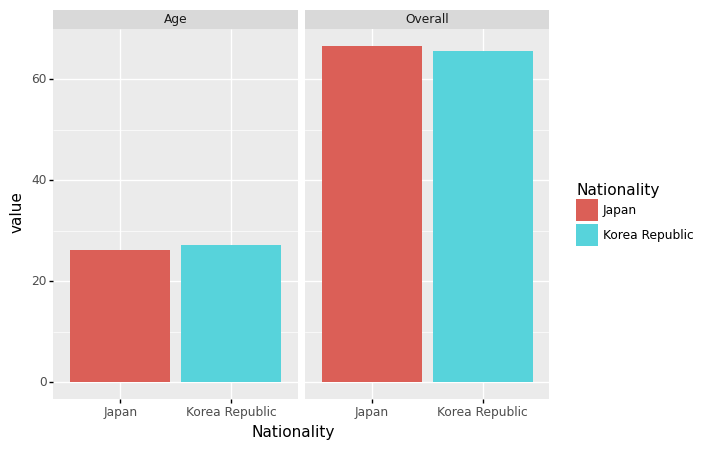

In [795]:
ggplot(data)+geom_col(aes(x='Nationality',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('level_1')

`-` 예시2: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [796]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

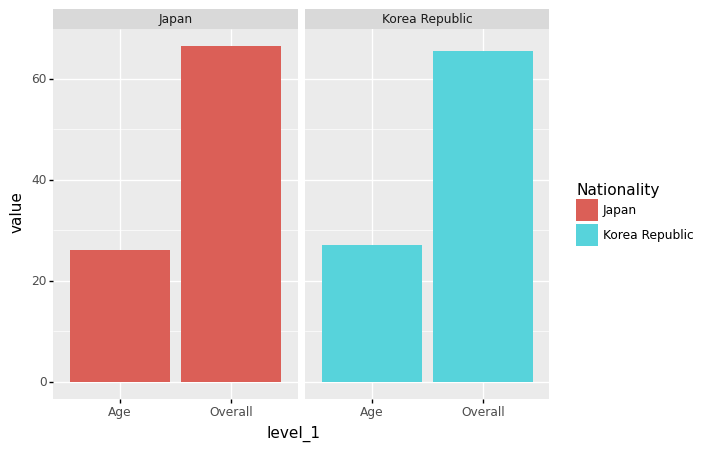

In [797]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('Nationality')

## geom_col + facet_grid(‘var_y ~ var_x’)

`-` 예시1: 한국과 일본의 평균연령+평균능력치+최대능력치 비교 (면분할)

In [808]:
data=df.groupby('Nationality').agg({'Overall':[np.mean,np.max],'Age':np.mean})\
.melt(ignore_index=False).reset_index()
data

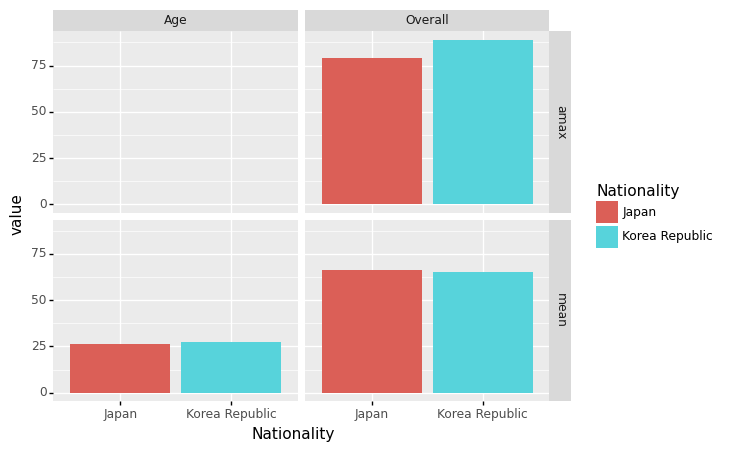

In [811]:
ggplot(data)+geom_col(aes(fill='Nationality',x='Nationality',y='value'),position='dodge')\
+facet_grid('variable_1~variable_0')

## geom_bar vs geom_col

`-` 예시1: 한국과 일본의 단순 선수 숫자 비교 (with goem_col)

In [820]:
data=df.groupby('Nationality').agg({'Age':'count'}).reset_index().rename({'Age':'count'},axis=1)
data

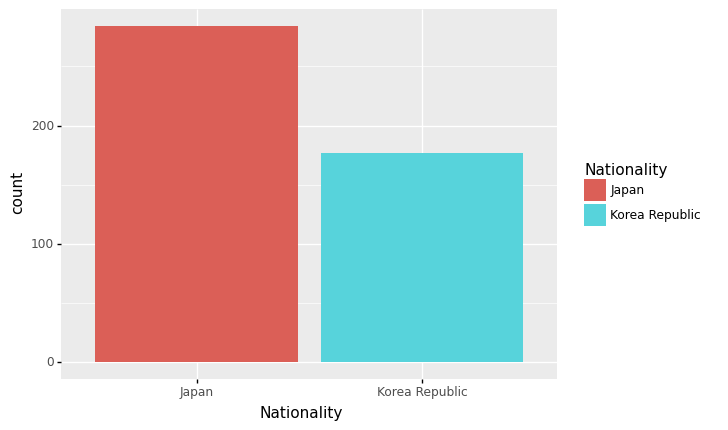

In [821]:
ggplot(data)+geom_col(aes(x='Nationality',fill='Nationality',y='count'))

`-` 예시2: 한국과 일본의 단순 선수 숫자 비교 (with goem_bar)

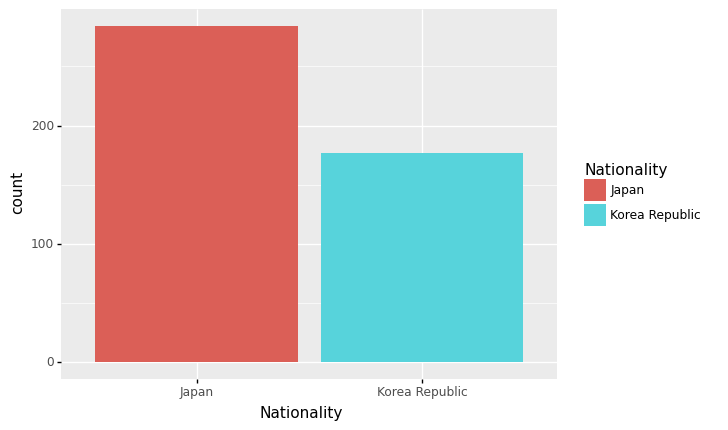

In [823]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'))

-   특징1: 원래 데이터프레임 그대로 하는게 아니라 뭔가 변형된 값이 출력
    (정확하게는 groupby + count가 변형요소)
-   특징2: y는 당연히 count이므로 y를 명시할 필요가 없음. (잘 생각해보면
    명시하고 싶어도 명시할 수 없음, y는 groupby + count 에 의해서 계산된
    값이고 df자체에는 존재하지 않음)

`-` 이렇게 약속된 변형은 `stat='count'` 옵션 때문에 가능함

-   stat=’count’는 그룹바이이후에 count를 하라는 의미

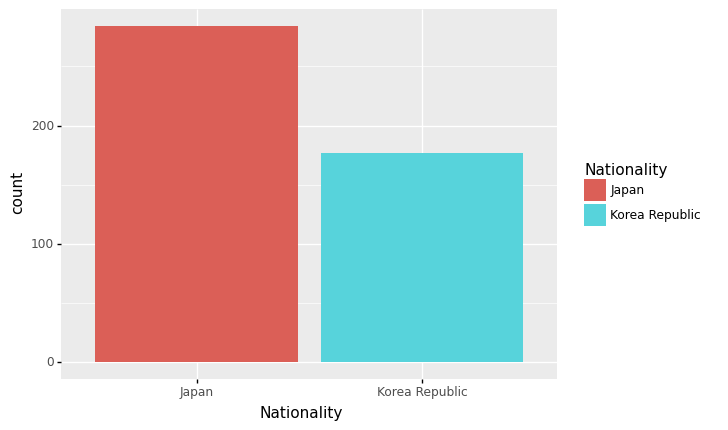

In [836]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='count')

`-` `stat='identity'` 로 옵션을 바꾸면 약속된 변환이 수행되지 않음

-   stat=’identity’는 아무 변환도 하지말라는 의미

In [837]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='identity')

-   에러가난다.

(참고) 사실 아래의 3개의 코드가 모두 같다. \<– 수업시간에 설명 X

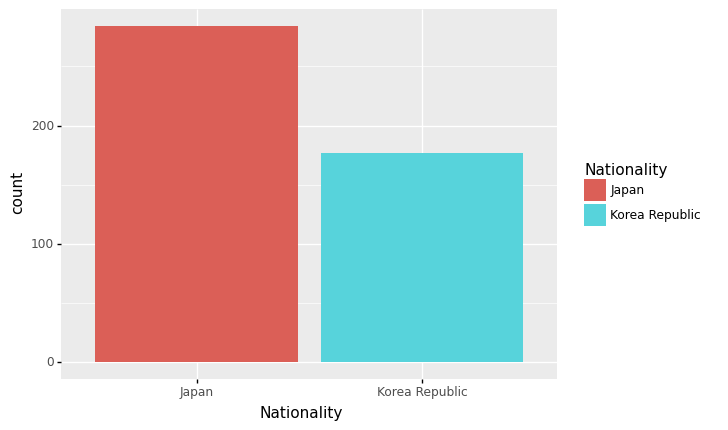

In [839]:
ggplot(df)+geom_bar(aes(x='Nationality',y='..count..',fill='Nationality'),stat='count')
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='count') # y='..count..' 생략,
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality')) # y='..count..' 생략, stat='count' 생략

## geom_bar()의 불편한점

`-` 사실 편하라고 만든것 같은데, 그닥 편하지 않음.

-   편하라고 만든 점1: groupby를 자동으로 해줘서 groupby를 못하는
    유저들이 사용하기 편리하게 함 -\> 그런데 우리는 groupby 잘함
-   편하라고 만든 점2: groupby이후 count연산을 알아서 해줌 -\> 그런데
    count연산만 알아서해주고 그 이외의 연산은 잘 지원안됨

`-` 결론: groupby + count 조합에서만 편리하고 나머지는 편하지 않다.

`-` 불편한 예시: 나라별 overall의 평균을 geom_bar()로 플랏해보라.

In [827]:
data= df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

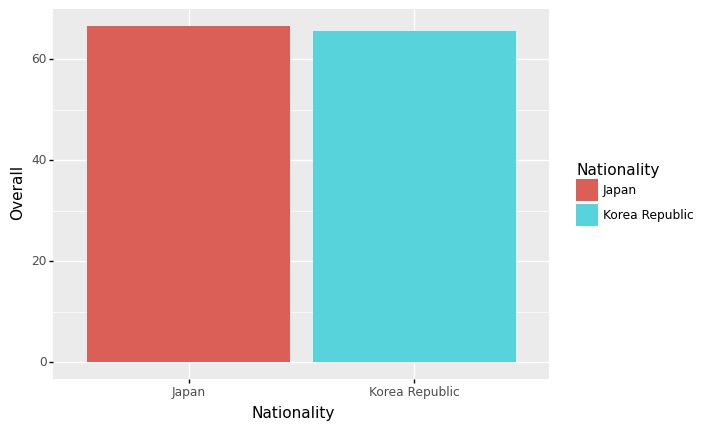

In [833]:
ggplot(data)+geom_bar(aes(x='Nationality',y='Overall',fill='Nationality'),stat='identity')
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))

# 심슨의 역설

`-` 버클리대학교의 입학데이터

-   <https://github.com/guebin/DV2022/blob/master/_notebooks/ds.pdf>

`-` 주장: 버클리대학에 gender bias가 존재한다.

-   1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬
    많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

## 시각화1: 전체합격률

`-` df1

In [4]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()

`-` df2

In [5]:
df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

`-` merge: 두개의 데이터프레임을 합친다

In [6]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))

`-` 비율계산

In [7]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

`-` 시각화

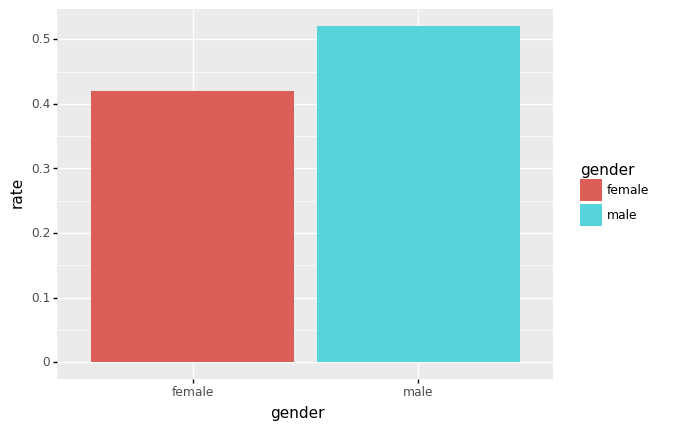

In [8]:
data1= df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data1.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))

`-` 결론: 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

## 시각화2: 학과별 합격률

`-` df2

In [9]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

`-` merge

In [10]:
df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

`-` 시각화

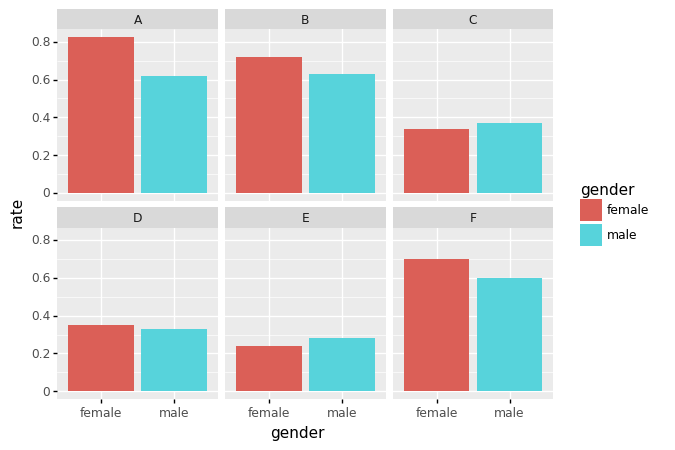

In [11]:
data2=df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))\
+facet_wrap('department')

-   학과별로 살펴보니 오히려 A,B,F,D의 경우 여성의 합격률이 높다.

`-` 교재에서 설명한 이유: 여성이 합격률이 낮은 학과에만 많이 지원하였기
때문

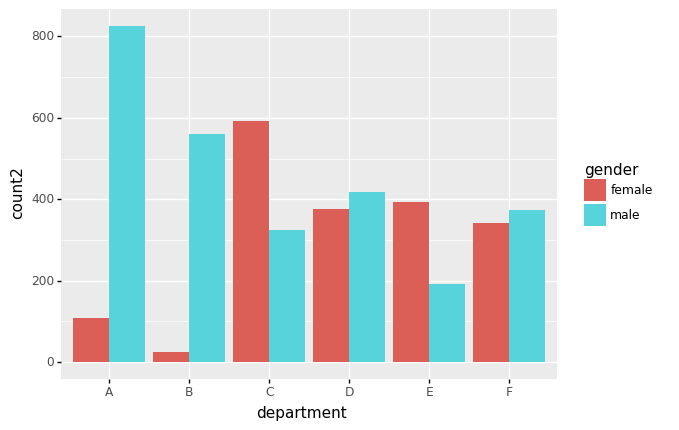

In [12]:
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='department',y='count2',fill='gender'),position='dodge')

-   살펴보니 합격률이 높은 A,B학과의 경우 상대적으로 남성이 많이
    지원하였음. 합격률이 낮은 C,D학과는 상대적으로 여성이 많이 지원함.
    D,F의 지원수는 비슷

# HW

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson2.csv")
df

`-` 시각화1: 남녀합격률시각화

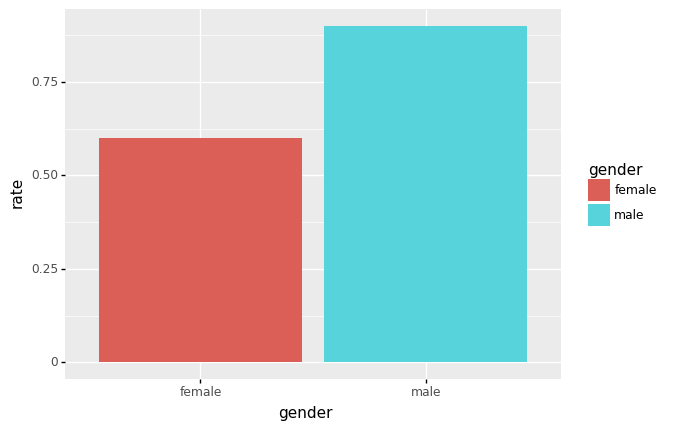

In [20]:
# 시각화예시 

`-` 시각화2: 학과별 남녀합격률 시각화

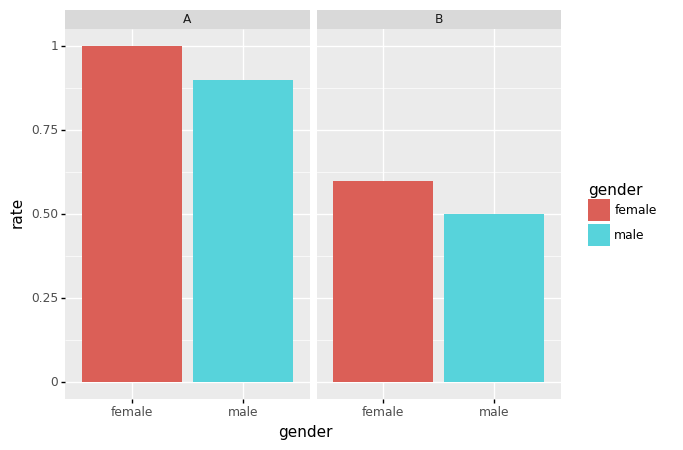

In [330]:
# 시각화예시 

-   A학과: 쓰면 거의 붙는 학과
-   B학과: 쓰면 반정도 붙는 학과

`-` 시각화3: 학과별 지원자 수 시각화

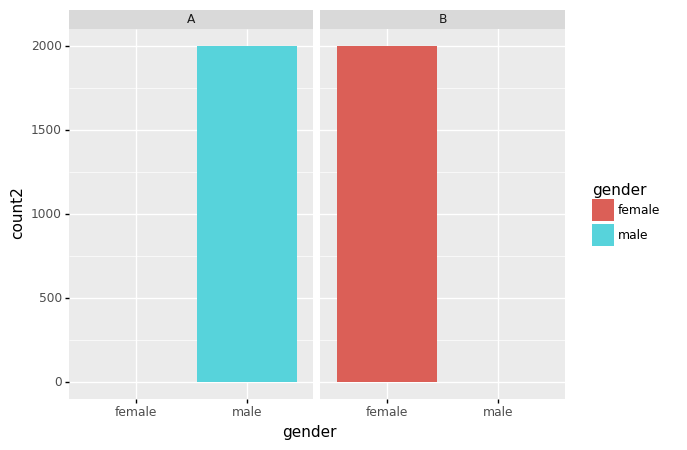

In [332]:
# 시각화예시

-   여학생은 쓰면 붙는 A학과에는 거의 지원안함, 대신에 쓰면 반정도 붙는
    B학과에 대부분 지원함

# HW

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

1.  성별(Sex) 평균급여(Salary)를 구하고 아래의 지침에 따라 시각화 하라.

-   barplot으로 시각화
-   성별을 색깔과 x축으로 구분
-   평균급여는 y축으로 구분

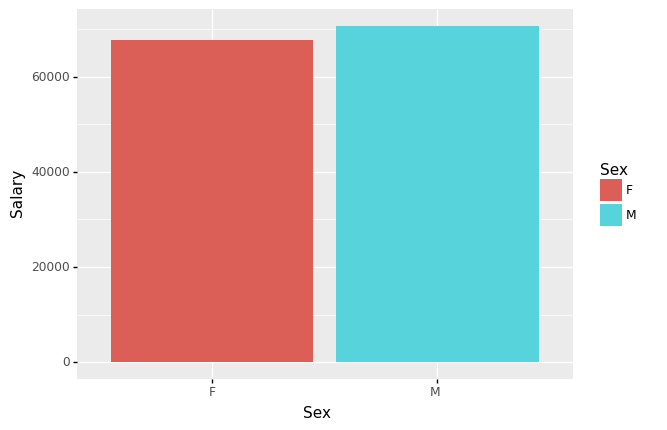

In [849]:
# 시각화예시

1.  성별(Sex)/인종별(RaceDesc) 평균급여(Salary)를 구하고 아래의 지침에
    따라 시각화 하라.

-   barplot으로 시각화
-   인종은 면분할로 구분
-   성별은 x축과 색깔로 구분
-   평균급여는 y축으로 구분

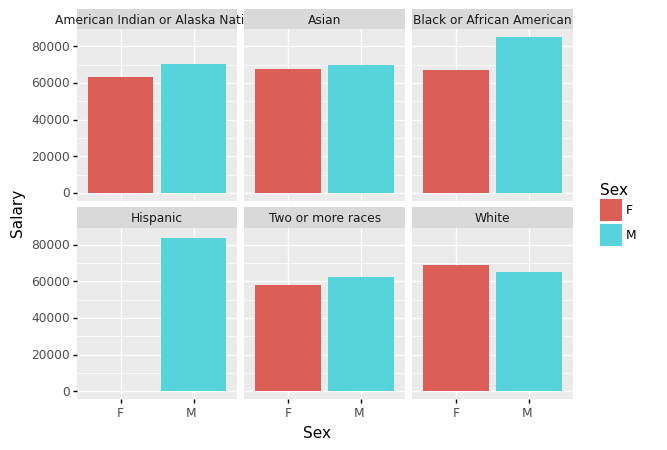

In [885]:
# 시각화예시